This notebook contains exploratory data analysis for the MIT ADSP capstone project on facial emotion detection.

Performed here:
- Explore the dataset size and distribution of images by class
- Visualize a random sampling of dataset images

Google Colab setup

In [ ]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Set main directory
main_directory = '/content/drive/MyDrive/facial-emotion-detection-cnn'

Mounted at /content/drive


Get some helpful tools

In [ ]:
# Import the libraries
import os
from pathlib import Path
import zipfile
import glob
import random
import base64
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

Access 'common_functions.py' file

In [ ]:
# Specify path to common functions python file
project_path = Path(os.path.join(main_directory, 'notebooks'))
common_functions_file = 'common_functions.py'

# Construct the full path of common functions python file
full_path = project_path / common_functions_file

# Use exec to run the file
exec(open(full_path).read())

The MIT ADSP program office has provided a dataset of facial images pre-sorted by their associated emotions: happy, sad, surprise, and neutral. These have been divided into training, validation, and test subsets.

Load and unzip the original data

In [ ]:
# Specify path to zipfile
zip_file_path = os.path.join(main_directory, 'data/Facial_emotion_images.zip')

# Specify directory to extract to
extract_to_directory = os.path.join(main_directory, 'data/')

# Create the directory if it does not exist
os.makedirs(extract_to_directory, exist_ok=True)

# # Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_directory)

Explore the size of the original dataset

In [ ]:
# Set original data directory
original_data_directory = os.path.join(main_directory, 'data/Facial_emotion_images')

# Print number of files within the original data directory
print_number_of_files(original_data_directory)

Number of .jpg files in /content/drive/MyDrive/facial-emotion-detection-cnn/data/Facial_emotion_images: 20214
Number of .jpg files in /content/drive/MyDrive/facial-emotion-detection-cnn/data/Facial_emotion_images/test: 128
Number of .jpg files in /content/drive/MyDrive/facial-emotion-detection-cnn/data/Facial_emotion_images/test/happy: 32
Number of .jpg files in /content/drive/MyDrive/facial-emotion-detection-cnn/data/Facial_emotion_images/test/neutral: 32
Number of .jpg files in /content/drive/MyDrive/facial-emotion-detection-cnn/data/Facial_emotion_images/test/sad: 32
Number of .jpg files in /content/drive/MyDrive/facial-emotion-detection-cnn/data/Facial_emotion_images/test/surprise: 32
Number of .jpg files in /content/drive/MyDrive/facial-emotion-detection-cnn/data/Facial_emotion_images/train: 15109
Number of .jpg files in /content/drive/MyDrive/facial-emotion-detection-cnn/data/Facial_emotion_images/train/happy: 3976
Number of .jpg files in /content/drive/MyDrive/facial-emotion-det

Visualize distribution of dataset and classes

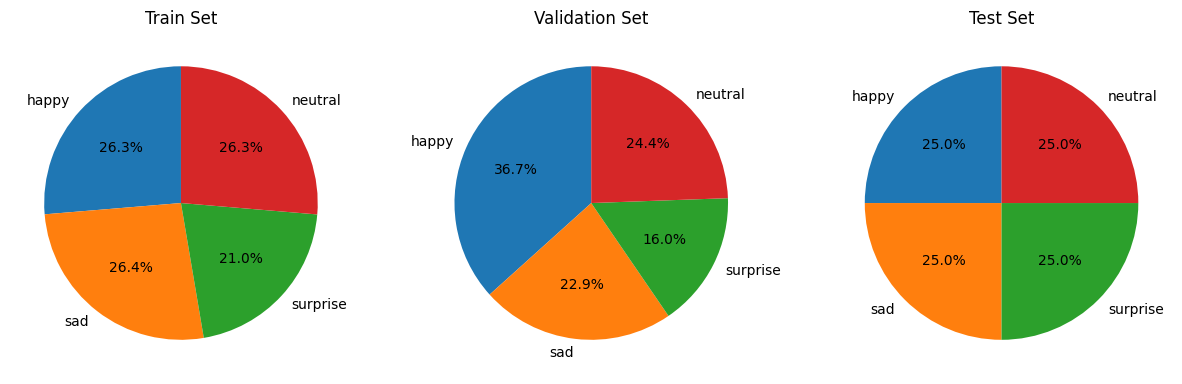



Number Total Images in Train Set: 15109 (74.75%)
Number of Total Images in Validation Set: 4977 (24.62%)
Number of Total Images in Test Set: 128 (0.63%)
Number of Total Images: 20214


In [ ]:
# Show distribution of data in train, validation, and test set
show_pie_charts(original_data_directory)

**Observations:** The ~20K images are divided into training, validation, and tests in the ratio above. The training and validation sets have less representation of the 'surprise' class. The Validation set has much more 'happy' representation' than any other class.

Visualize a random sampling from the provided dataset

In [ ]:
# Function to randomly select and display images
def display_random_images(emotion, dataset):
    # Get a random sample of 12 image files from each emotion class from each dataset
    emotion_dir = os.path.join(original_data_directory, dataset, emotion)
    image_files = random.sample(os.listdir(emotion_dir), 12)

    # Construct the HTML string to display the images
    display_str = f'<div style="display:flex; flex-wrap: wrap;">'
    for image_file in image_files:
        image_path = os.path.join(emotion_dir, image_file)
        with open(image_path, "rb") as img_file:
            img_data = base64.b64encode(img_file.read()).decode("ascii")
            img_html = f'<img src="data:image/png;base64,{img_data}" style="margin: 5px; width: 180px; height: auto;"/>'
            display_str += img_html

    display_str += '</div>'
    display(HTML(display_str))

# Emotions and datasets
emotions = ['happy', 'sad', 'surprise', 'neutral']
datasets = ['train', 'validation', 'test']


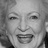
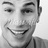
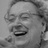
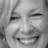
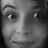
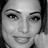
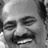
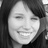
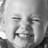
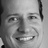
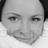
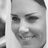


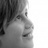
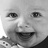
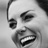
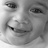
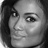
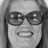
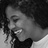
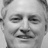
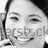
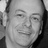
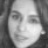
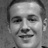


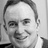
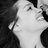
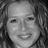
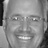
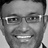
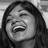
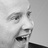
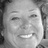
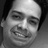
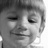
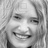
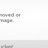

In [ ]:
# Show a random sampling from 'happy'
for dataset in datasets:
  display_random_images('happy', dataset)


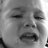
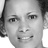
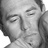
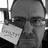
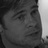
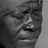
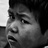
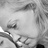
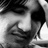
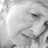
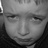
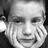


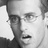
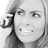
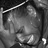
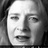
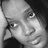
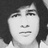
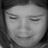
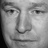
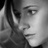
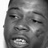
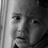
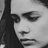


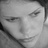
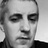
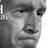
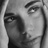
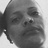
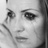
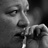
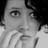
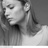
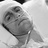
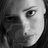
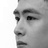

In [ ]:
# Show a random sampling from 'sad'
for dataset in datasets:
  display_random_images('sad', dataset)


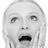
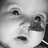
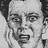
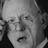
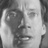
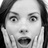
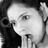
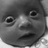
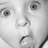
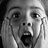
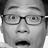
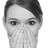


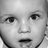
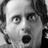
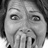
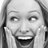
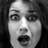
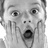
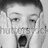
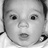
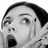
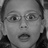
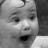
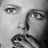


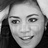
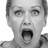
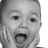
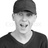
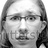
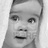
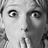
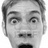
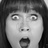
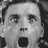
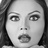
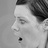

In [ ]:
# Show a random sampling from 'surprise'
for dataset in datasets:
  display_random_images('surprise', dataset)


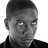
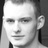
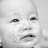
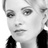
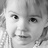
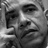
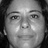
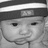
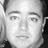
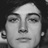
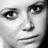
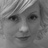


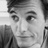
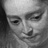
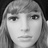
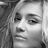
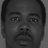
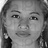
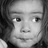
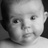
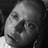
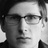
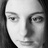
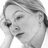


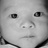
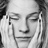
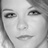
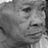
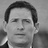
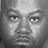
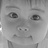
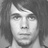
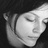
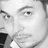
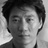
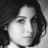

In [ ]:
# Show a random sampling from 'neutral'
for dataset in datasets:
  display_random_images('neutral', dataset)

**Observations:**

On the quality of the images:
- Some images have overlayed text or numbers e.g. shutterstock or other numbers
- There are some images that are not faces at all e.g. blank squares or missing images
- I don't necessarily agree with some of the provided labels, specifically between the 'sad' and 'neutral' categories

On the diversity of the image faces:
- There is a variety of ages, ranging from less than 1 year to over 70 years old
- There is a variety of genders and skin tones
- There is a variety of hair styles / facial hair
- Some people are wearing glasses, sunglasses, hats, headsets, eyepatches
- There are some non-human cartoon/sketch faces

On the diversity of facial arrangement and contrast:
- Some images are full face, others have different levels of zoom/cropping (predominantly chin or forehead cut off)
- Sometimes the face is straight aligned, sometimes angled
- Sometimes the face is camera facing, sometimes side profile
- There are varying degrees of contrast between the foreground and the background and choice of lighting
- Most of the time the image is just a face, but in some cases there are items in the background e.g. a laptop

Some notable characteristics with respect to the defined classes:
- Happy: lots of teeth
- Sad: larger proportion of angled down faces, more frequently not camera facing
- Surprise: raised eyebrows, wide eyes, frequently hands on face, mouths open
- Neutral: difficult to identify